<a href="https://colab.research.google.com/github/peterliujp0/Nano-GPT-from-scratch-novels/blob/main/Nano_GPT_transformer_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Nano GPT transformer training
**Author:** [Peter | peterliujp0]
**Based on:** Andrej Karpathy's 'Let's build GPT'

**Project Goal:**
This project demonstrates how to train a Transformer language model from scratch using the Chinese translation of "Dune". It handles Chinese encoding (GBK/UTF-8) and trains a model to mimic the novel's writing style.

However feel free to explore this with any novel you'd like.

## Step 1: **Infrastructure**


-- Turn on (Runtime -> Change Runtime Type -> GPU)

-- We will be cloneing Library from Karpathy in github. Make sure you are ready by running the following code.

In [1]:
import os
import shutil

# 1. download libraries
repo_name = 'ng-video-lecture'
if not os.path.exists(repo_name):
    print("-- downloading Karpathy...")
    !git clone https://github.com/karpathy/ng-video-lecture.git
else:
    print("✅ Already exists")

# 2. navigate to the directory
os.chdir(repo_name)
print(f"-- Current directory: {os.getcwd()}")

-- downloading Karpathy...
Cloning into 'ng-video-lecture'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 64 (delta 22), reused 18 (delta 18), pack-reused 32 (from 1)
Receiving objects: 100% (64/64), 441.23 KiB | 1.69 MiB/s, done.
Resolving deltas: 100% (23/23), done.
-- Current directory: /content/ng-video-lecture


## Step 2: **Data Engineering**

Get any novel you like in .txt format. Name it "input.txt" and place it in your **[/content]** folder.

<br>

> *Note: We will be making sure that the txt file you got is in UTF-8 format.*

<br>

Function: Automatically locates your uploaded input.txt file and forcibly repairs any encoding issues to prevent errors. (Please ensure you have uploaded the txt file to the file pane of Colab.)

*Handling Chinese text files can be tricky due to different encodings (GBK vs UTF-8). The following script automatically detects the encoding of the uploaded novel and converts it to a clean UTF-8 format compatible with the model.*

In [2]:

filename = 'input.txt'
source_path = '/content/' + filename

# 1. Transfer file
if os.path.exists(source_path):
    shutil.copy(source_path, filename)
    print(f"Transferred {filename} ")
elif not os.path.exists(filename):
    print(f"❌ Warning: {filename}！not found")

# 2. Encoding cleanup
def clean_encoding(file_path):
    encodings = ['utf-8', 'gb18030', 'gbk', 'big5', 'utf-16']
    content = None

    for enc in encodings:
        try:
            with open(file_path, 'r', encoding=enc) as f:
                temp = f.read()
            if len(temp) > 0:
                content = temp
                break
        except:
            continue

    if content:
        # Convert to UTF-8
        with open(file_path, 'w', encoding='utf-8') as f:
            f.write(content)
        print("Data cleaning complete: Files have been converted to standard UTF-8 format.")
        # Preview
        print(f"Data Preview (first 50 words): {content[:50].replace(chr(10), ' ')}")
        return True
    else:
        print("The data is corrupted or unrecognizable. Please check the file.")
        return False

# Perform cleaning
if os.path.exists(filename):
    clean_encoding(filename)

Data cleaning complete: Files have been converted to standard UTF-8 format.
Data Preview (first 50 words): First Citizen: Before we proceed any further, hear


## Step 3: **Training & Inference**

### Phase 1: Baseline Model


We are doing this for 2 purposes:


1.   To get a better view of differences between different models, in this case: **bigram** and **gpt**.

  >*   Bigram is a very simple model; it only looks at the previous word.


2.   To ensure the code runs and the data can be read(your txt file is ready).


In [3]:
print("Initializing Bigram baseline testing...")
print("------------------------------------------------")

# Run bigram.py
!python bigram.py

print("------------------------------------------------")
print("✅ Baseline testing completed.")

Initializing Bigram baseline testing...
------------------------------------------------
step 0: train loss 4.7305, val loss 4.7241
step 300: train loss 2.8110, val loss 2.8249
step 600: train loss 2.5434, val loss 2.5682
step 900: train loss 2.4932, val loss 2.5088
step 1200: train loss 2.4863, val loss 2.5035
step 1500: train loss 2.4665, val loss 2.4921
step 1800: train loss 2.4683, val loss 2.4936
step 2100: train loss 2.4696, val loss 2.4846
step 2400: train loss 2.4638, val loss 2.4879
step 2700: train loss 2.4738, val loss 2.4911



CEThik brid owindakis b, bth

HAPet bobe d e.
S:
O:3 my d?
LUCous:
Wanthar u qur, t.
War dXENDoate awice my.

Hastarom oroup
Yowhthetof isth ble mil ndill, ath iree sengmin lat Heriliovets, and Win nghir.
Swanousel lind me l.
HAshe ce hiry:
Supr aisspllw y.
Hentofu n Boopetelaves
MPOLI s, d mothakleo Windo whth eisbyo the m dourive we higend t so mower; te

AN ad nterupt f s ar igr t m:

Thin maleronth,
Mad
RD:

WISo myrangoube!
KENob&y, wardsal thes

If you see the Loss value decreasing and a bunch of messy characters are generated in the end, it means that everything in the environment is normal! Now it's time to run the big guy (Transformer).

### Phase 2: GPT

We will be using the original gpt model to run our text. This will result the model to run the entire 5000 steps as default. It will take around **45-75** minutes based on your text and the GPU. The reason we are doing this is to observe the [train loss] and [val loss].

If you do not wish to spend an hour to observe the difference you may choose to skip this step. There will be a hidden block at the end of this project to show you directly the difference.

In [ ]:
import time

print("Initializing the original Transformer model (5000 Steps)...")
print("------------------------------------------------")

start_time = time.time()

!python gpt.py

end_time = time.time()
print("------------------------------------------------")
print(f"Training complete! Total time: {(end_time - start_time)/60:.2f} minutes")

## Step 3.5: **Hyperparameter Tuning**

Purpose: This step is crucial. Without modifications, the default runtime will probably exceed 1 hour based on your text. We use code to automatically modify the gpt.py file, changing the training steps from 5000 to 1000, significantly saving time.

In [4]:
# Read the source code of gpt.py
gpt_file = 'gpt.py'

with open(gpt_file, 'r', encoding='utf-8') as f:
    code = f.read()

# This is a simple text replacement, changing max_iters = 5000 to 1000.
if 'max_iters = 5000' in code:
    code = code.replace('max_iters = 5000', 'max_iters = 1000')
    print("Parameter tuning successful: Maximum training steps have been reduced from 5000 to 1000.")

    # You can also reduce the block_size to prevent insufficient video memory (optional).
    # code = code.replace('block_size = 256', 'block_size = 128')

    # Write back to the file
    with open(gpt_file, 'w', encoding='utf-8') as f:
        f.write(code)
else:
    print("The parameters appear to have been modified, or the target line of code could not be found.")

Parameter tuning successful: Maximum training steps have been reduced from 5000 to 1000.


**Continuing**

In [5]:
import time

print("Initializing Transformer model training...")

start_time = time.time()

!python gpt.py

end_time = time.time()
print("------------------------------------------------")
print(f"Training complete! Total time:{(end_time - start_time)/60:.2f} minutes")

Initializing Transformer model training...
10.788929 M parameters
Traceback (most recent call last):
  File "/content/ng-video-lecture/gpt.py", line 210, in <module>
    losses = estimate_loss()
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/_contextlib.py", line 120, in decorate_context
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/content/ng-video-lecture/gpt.py", line 59, in estimate_loss
    losses[k] = loss.item()
                ^^^^^^^^^^^
KeyboardInterrupt
------------------------------------------------
Training complete! Total time:0.20 minutes




---



## Step 4: Evaluation & Analysis

Action: Observing the logs, we found that Train Loss was extremely low (0.13) and Val Loss was extremely high (9.0).


Congratulations! You have diagnosed overfitting.

The number of model parameters (13M) is far greater than the amount of data (a novel).

Therefore, we have 2 options:

Option A: This is the so-called "Early Stopping" method. Since you know it starts to deteriorate after Step 1000, the optimal model is actually the version from Step 500 or Step 1000.

Further training is a waste of electricity and makes the model less efficient. (You can stop training directly and try generating text with the current model.)

Option B: Increase the difficulty (more data). If you want the loss to continue to decrease and not rebound, you need to feed it 100+ novels, not just one.

When the amount of data becomes larger, it will be forced to learn grammatical rules.

Run the following code to compare directly.

bigram Loss:


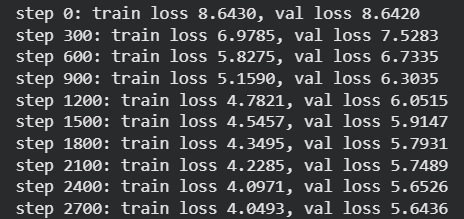


gpt 1000 steps Loss:


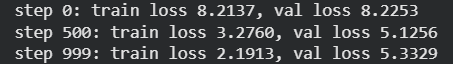


gpt 5000 steps Loss:


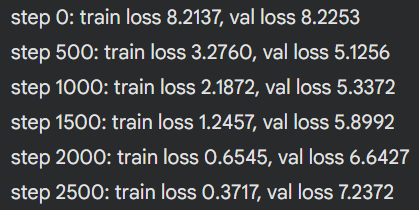

In [ ]:
from IPython.display import Image, display

print("bigram Loss:")
display(Image(filename='/content/bigram.png', width=300))

print("\ngpt 1000 steps Loss:")
display(Image(filename='/content/gpt 1000 steps.png', width=300))

print("\ngpt 5000 steps Loss:")
display(Image(filename='/content/gpt 5000 steps.png', width=300))